In [28]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [29]:
df_analyse=pd.read_csv('../EDS2/CompleteProcessedData.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-03-02,55759.0,3913621.0,108823.0,113430.0,10908.0,20882.0,18.0,769.0,2118676.0,...,79961.0,1.0,27.0,139934.0,2475.0,9.0,115180244.0,2342.0,79557.0,36148.0
1,2021-03-03,55770.0,3924485.0,109674.0,113593.0,10948.0,20923.0,18.0,769.0,2126531.0,...,80035.0,1.0,27.0,140383.0,2482.0,9.0,115622105.0,2363.0,80090.0,36179.0
2,2021-03-04,55775.0,3937063.0,110521.0,113761.0,10976.0,20981.0,18.0,813.0,2133963.0,...,80035.0,1.0,27.0,140960.0,2488.0,9.0,116081000.0,2375.0,80687.0,36223.0
3,2021-03-05,55827.0,3945600.0,111301.0,113948.0,10998.0,21026.0,18.0,813.0,2141854.0,...,80081.0,1.0,27.0,141356.0,2494.0,9.0,116530776.0,2411.0,81341.0,36248.0
4,2021-03-06,55840.0,3955555.0,112078.0,114104.0,11019.0,21055.0,18.0,813.0,2146714.0,...,80125.0,1.0,27.0,141885.0,2501.0,9.0,116945049.0,2444.0,82011.0,36260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2022-07-16,183445.0,12169669.0,295243.0,266424.0,44671.0,101901.0,3496.0,8712.0,9426171.0,...,242140.0,11722.0,29.0,529730.0,10759850.0,456.0,561998568.0,11848.0,327994.0,256083.0
502,2022-07-17,183572.0,12171116.0,296305.0,266445.0,44671.0,101901.0,3496.0,8712.0,9465827.0,...,242140.0,11722.0,29.0,530402.0,10760595.0,456.0,562455847.0,11848.0,327994.0,256083.0
503,2022-07-18,183687.0,12176520.0,296732.0,266487.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242305.0,11730.0,29.0,530649.0,10761435.0,456.0,563691826.0,11848.0,327994.0,256083.0
504,2022-07-19,183908.0,12208985.0,298578.0,266542.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242366.0,11730.0,29.0,530649.0,10762532.0,533.0,565214838.0,11849.0,328550.0,256187.0


In [30]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=800000000 #max susceptible population
beta=0.8   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [31]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [32]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

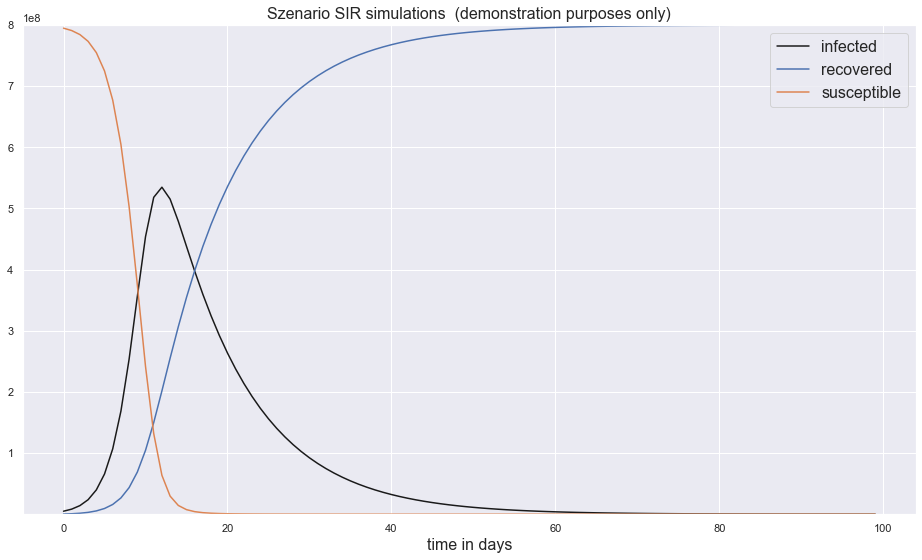

In [33]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 800000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [34]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Fitting data to a model

In [35]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [36]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [37]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [38]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00430181 0.00094463]  start infect: 4922891.145010176
Optimal parameters: beta = 0.7490928855717225  and gamma =  0.09877863374778025


In [39]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

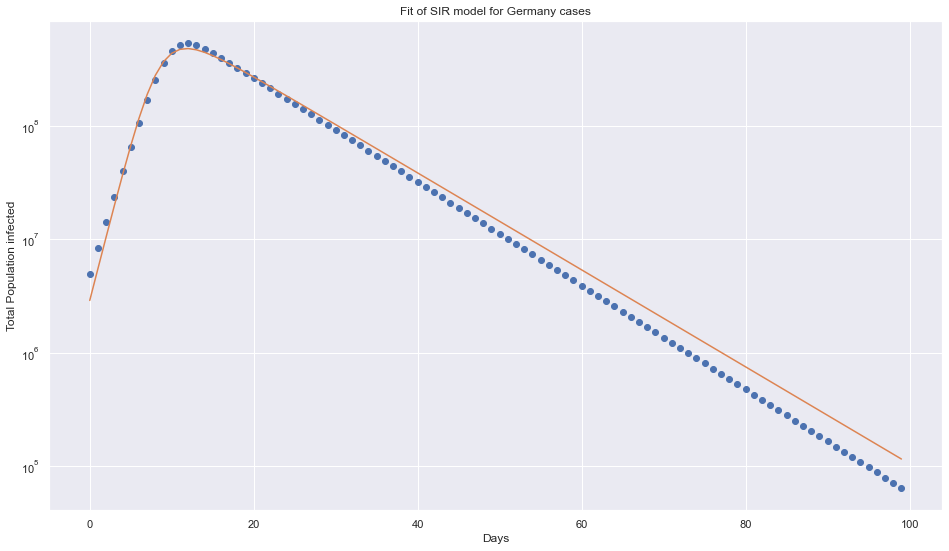

Optimal parameters: beta = 0.7490928855717225  and gamma =  0.09877863374778025
Basic Reproduction Number R0  7.583551798098808


In [40]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

# Fitting the parameters of SIR model

In [41]:
df_analyse

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-03-02,55759.0,3913621.0,108823.0,113430.0,10908.0,20882.0,18.0,769.0,2118676.0,...,79961.0,1.0,27.0,139934.0,2475.0,9.0,115180244.0,2342.0,79557.0,36148.0
1,2021-03-03,55770.0,3924485.0,109674.0,113593.0,10948.0,20923.0,18.0,769.0,2126531.0,...,80035.0,1.0,27.0,140383.0,2482.0,9.0,115622105.0,2363.0,80090.0,36179.0
2,2021-03-04,55775.0,3937063.0,110521.0,113761.0,10976.0,20981.0,18.0,813.0,2133963.0,...,80035.0,1.0,27.0,140960.0,2488.0,9.0,116081000.0,2375.0,80687.0,36223.0
3,2021-03-05,55827.0,3945600.0,111301.0,113948.0,10998.0,21026.0,18.0,813.0,2141854.0,...,80081.0,1.0,27.0,141356.0,2494.0,9.0,116530776.0,2411.0,81341.0,36248.0
4,2021-03-06,55840.0,3955555.0,112078.0,114104.0,11019.0,21055.0,18.0,813.0,2146714.0,...,80125.0,1.0,27.0,141885.0,2501.0,9.0,116945049.0,2444.0,82011.0,36260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2022-07-16,183445.0,12169669.0,295243.0,266424.0,44671.0,101901.0,3496.0,8712.0,9426171.0,...,242140.0,11722.0,29.0,529730.0,10759850.0,456.0,561998568.0,11848.0,327994.0,256083.0
502,2022-07-17,183572.0,12171116.0,296305.0,266445.0,44671.0,101901.0,3496.0,8712.0,9465827.0,...,242140.0,11722.0,29.0,530402.0,10760595.0,456.0,562455847.0,11848.0,327994.0,256083.0
503,2022-07-18,183687.0,12176520.0,296732.0,266487.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242305.0,11730.0,29.0,530649.0,10761435.0,456.0,563691826.0,11848.0,327994.0,256083.0
504,2022-07-19,183908.0,12208985.0,298578.0,266542.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242366.0,11730.0,29.0,530649.0,10762532.0,533.0,565214838.0,11849.0,328550.0,256187.0


In [42]:
## slice out some true data of a country

ydata = np.array(df_analyse.Germany[::])
t=np.arange(len(ydata))

In [43]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=800000000

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of invected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 2451011.0
cumulative sum of invected after period 30131303.0
Number of days 506
N0 800000000


In [44]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

standard deviation errors :  [0.32671048 0.34717488]  start infect: 2451011.0
Optimal parameters: beta = -0.7250482360631871  and gamma =  -0.7617182387241744


In [45]:
df_analyse=df_analyse.iloc[:150, : ]
df_analyse


,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-03-02,55759.0,3913621.0,108823.0,113430.0,10908.0,20882.0,18.0,769.0,2118676.0,...,79961.0,1.0,27.0,139934.0,2475.0,9.0,115180244.0,2342.0,79557.0,36148.0
1,2021-03-03,55770.0,3924485.0,109674.0,113593.0,10948.0,20923.0,18.0,769.0,2126531.0,...,80035.0,1.0,27.0,140383.0,2482.0,9.0,115622105.0,2363.0,80090.0,36179.0
2,2021-03-04,55775.0,3937063.0,110521.0,113761.0,10976.0,20981.0,18.0,813.0,2133963.0,...,80035.0,1.0,27.0,140960.0,2488.0,9.0,116081000.0,2375.0,80687.0,36223.0
3,2021-03-05,55827.0,3945600.0,111301.0,113948.0,10998.0,21026.0,18.0,813.0,2141854.0,...,80081.0,1.0,27.0,141356.0,2494.0,9.0,116530776.0,2411.0,81341.0,36248.0
4,2021-03-06,55840.0,3955555.0,112078.0,114104.0,11019.0,21055.0,18.0,813.0,2146714.0,...,80125.0,1.0,27.0,141885.0,2501.0,9.0,116945049.0,2444.0,82011.0,36260.0
5,2021-03-07,55847.0,3964028.0,112897.0,114234.0,11042.0,21086.0,18.0,848.0,2149636.0,...,80176.0,1.0,27.0,142338.0,2512.0,10.0,117319541.0,2473.0,82421.0,36271.0
6,2021-03-08,55876.0,3973315.0,113580.0,114382.0,11069.0,21108.0,18.0,848.0,2154694.0,...,80219.0,3.0,27.0,142774.0,2524.0,37.0,117624337.0,2545.0,82655.0,36289.0
7,2021-03-09,55876.0,3981120.0,114209.0,114543.0,11089.0,21114.0,18.0,862.0,2162001.0,...,80247.0,3.0,27.0,143321.0,2526.0,74.0,118038036.0,2586.0,82897.0,36321.0
8,2021-03-10,55894.0,3991541.0,114840.0,114681.0,11130.0,21161.0,18.0,882.0,2169694.0,...,80268.0,3.0,27.0,143321.0,2529.0,90.0,118497013.0,2627.0,83333.0,36341.0
9,2021-03-11,55917.0,4006762.0,115442.0,114851.0,11130.0,21205.0,18.0,882.0,2177898.0,...,80392.0,3.0,27.0,144277.0,2533.0,134.0,118986721.0,2667.0,83913.0,36377.0


In [46]:
df_analyse=df_analyse.drop(['Mongolia'], axis=1)

In [47]:
df_analyse=df_analyse.drop(['Vietnam'], axis=1)

In [48]:
df_analyse.to_csv('../EDS2/COVID_sir_length.csv', sep=';',index=False)

In [49]:
df_analyse

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-03-02,55759.0,3913621.0,108823.0,113430.0,10908.0,20882.0,18.0,769.0,2118676.0,...,59171.0,79961.0,1.0,27.0,139934.0,9.0,115180244.0,2342.0,79557.0,36148.0
1,2021-03-03,55770.0,3924485.0,109674.0,113593.0,10948.0,20923.0,18.0,769.0,2126531.0,...,60074.0,80035.0,1.0,27.0,140383.0,9.0,115622105.0,2363.0,80090.0,36179.0
2,2021-03-04,55775.0,3937063.0,110521.0,113761.0,10976.0,20981.0,18.0,813.0,2133963.0,...,60945.0,80035.0,1.0,27.0,140960.0,9.0,116081000.0,2375.0,80687.0,36223.0
3,2021-03-05,55827.0,3945600.0,111301.0,113948.0,10998.0,21026.0,18.0,813.0,2141854.0,...,61929.0,80081.0,1.0,27.0,141356.0,9.0,116530776.0,2411.0,81341.0,36248.0
4,2021-03-06,55840.0,3955555.0,112078.0,114104.0,11019.0,21055.0,18.0,813.0,2146714.0,...,63010.0,80125.0,1.0,27.0,141885.0,9.0,116945049.0,2444.0,82011.0,36260.0
5,2021-03-07,55847.0,3964028.0,112897.0,114234.0,11042.0,21086.0,18.0,848.0,2149636.0,...,63837.0,80176.0,1.0,27.0,142338.0,10.0,117319541.0,2473.0,82421.0,36271.0
6,2021-03-08,55876.0,3973315.0,113580.0,114382.0,11069.0,21108.0,18.0,848.0,2154694.0,...,64700.0,80219.0,3.0,27.0,142774.0,37.0,117624337.0,2545.0,82655.0,36289.0
7,2021-03-09,55876.0,3981120.0,114209.0,114543.0,11089.0,21114.0,18.0,862.0,2162001.0,...,65527.0,80247.0,3.0,27.0,143321.0,74.0,118038036.0,2586.0,82897.0,36321.0
8,2021-03-10,55894.0,3991541.0,114840.0,114681.0,11130.0,21161.0,18.0,882.0,2169694.0,...,66484.0,80268.0,3.0,27.0,143321.0,90.0,118497013.0,2627.0,83333.0,36341.0
9,2021-03-11,55917.0,4006762.0,115442.0,114851.0,11130.0,21205.0,18.0,882.0,2177898.0,...,67717.0,80392.0,3.0,27.0,144277.0,134.0,118986721.0,2667.0,83913.0,36377.0


In [50]:
#Fitting parameter for SIR model
df_all = df_analyse.columns
df_all = list(df_all)
for each in df_all[1:]:
    ydata = np.array(df_analyse[each])
    t=np.arange(len(ydata))
    N0 = 80000000 #max susceptible population

    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0

    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata,maxfev=100000)
    perr = np.sqrt(np.diag(pcov))
    

    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df_analyse[each +'_fitted'] = fitted 

C:\Python39\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



In [51]:
df_analyse.to_csv('../EDS2/COVID_sir_fitted_table.csv', sep=';',index=False)

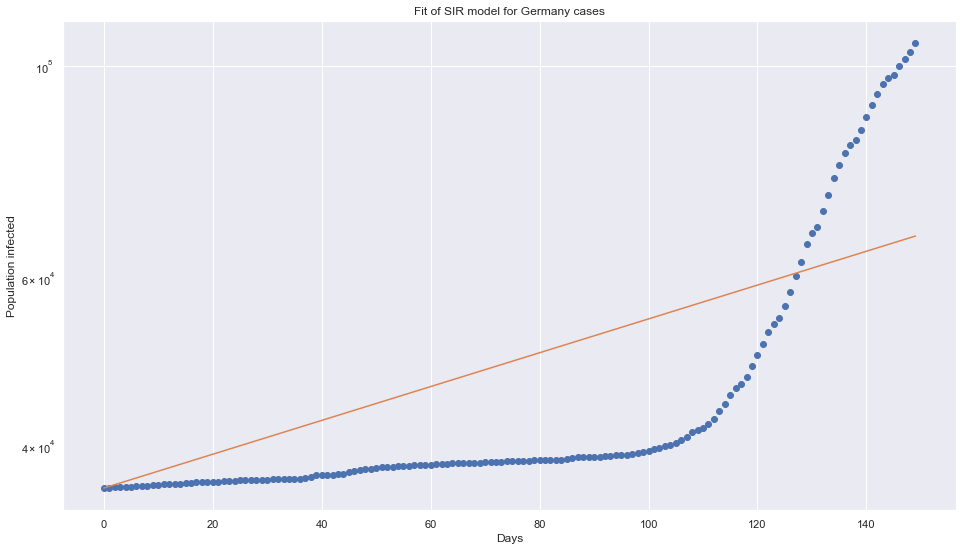

Optimal parameters: beta = -0.0013024954833129496  and gamma =  -0.005381133364529478
Basic Reproduction Number R0  0.24204854165082354


In [52]:
plt.semilogy(t,ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

In [53]:
df_analyse.columns

Index(['date', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay_fitted', 'Uzbekistan_fitted', 'Vanuatu_fitted',
       'Vatican_fitted', 'Venezuela_fitted', 'Wallis and Futuna_fitted',
       'World_fitted', 'Yemen_fitted', 'Zambia_fitted', 'Zimbabwe_fitted'],
      dtype='object', length=443)

In [54]:
import pandas as pd
import numpy as np
import dash_bootstrap_components as dbc

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State


import plotly.graph_objects as go
from plotly import tools

import os
print(os.getcwd())
df_country = pd.read_csv('../EDS2/COVID_sir_length.csv',sep=';')
df_input_sir = pd.read_csv('../EDS2/COVID_sir_fitted_table.csv',sep=';')
df_country_all = df_country.columns
df_all = df_input_sir.columns
df_all = list(df_all[:109])

'''Dashboard is created by using an external stylesheet named BOOTSTRAP. 
BOOTSTRAP allows us to divide the dashboard into Rows and columns.
COVID-19 dashbord has 5 Rows and 2 columns'''

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'SIR MODEL'

app.layout = html.Div([
        
        dbc.Row(dbc.Col(html.Div(dcc.Markdown('''
                            # Enterprise Data Science: COVID-19 Data Analytics
                            Goals of the project:
                            * To trace the confirmed cases for all the countries
                            * To simulate the spread of COVID-19 using SIR model for 100+ countries.
                            ''')),
                        width={'size': 10, 'offset': 1},
                        )
                ),
        
        dbc.Row(
            [   
                #Dropdown for SIR model
                dbc.Col(dcc.Dropdown(
                            id='country_dropdown_sir',
                            options=[ {'label': each,'value':each} for each in df_country_all[1:]],
                            value='Germany', # which are pre-selected
                            multi= False
                            ),
                        width={'size': 5, "offset": 2, 'order': 'second'}
                        ),
                ], align=True
        ),
                    
        dbc.Row(
            [
                
                dbc.Col(dcc.Graph(
                            id='SIR_model'
                            ),
                        width=6, md={'size': 5,  "offset": 1, 'order': 'last'}
                        ),
            ]
        ),


])


@app.callback(
    Output('SIR_model', 'figure'),
    [Input('country_dropdown_sir', 'value')])

def SIR_fig(con_input):
    df= df_input_sir
   
    
    for i in df[1:]:
        data = []
        trace = go.Scatter(x=df.date,
                        y=df[con_input],
                        mode='lines+markers',
                        name = con_input)
        data.append(trace)
        
        trace_fitted = go.Scatter(x=df.date,
                        y=df[con_input +'_fitted'], 
                        mode='lines+markers',
                        name=con_input+'_fitted')
        data.append(trace_fitted)
        
        
            
    return {'data': data,
            'layout' : dict(
                height=900,
                title= 'SIR model',
                xaxis={'title':'Days',
                    'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'title': "Infected population",
                    'type':"log",
                       'range':'[1.1,5.5]'
                      }
                
            )
        }

if __name__ == '__main__':

    app.run_server(debug=True, port= 8051, use_reloader=False)

C:\Users\pandh\Desktop\EDS2
Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
